<a href="https://colab.research.google.com/github/DhibarSumit10/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success.</b>

# **Objective of this Project -**


*   Installation of application by users according to the categories.

*   Mostly demanded applications in playstore.

*   Factors that affect the installation of application by the user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
Play_store_data_file_path = "/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - SUMIT KUMAR DHIBAR/Play Store Data.csv"
Play_store_data_df = pd.read_csv(Play_store_data_file_path)

## **First of all we will display all the columns names, shape, Null values and Datatypes of this Play Store dataset**

In [ ]:
# Print all the column names

Play_store_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Print the first 10 two rows of dataset

Play_store_data_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# Print the last 10 two rows of dataset

Play_store_data_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Checking the number of all rows and columns

In [ ]:
Play_store_data_df.shape

(10841, 13)

## Checking the information of all the columns like Datatype, Null values etc.

In [ ]:
Play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Data Cleaning**

**Overall statistics about the dataframe**

In [ ]:
Play_store_data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


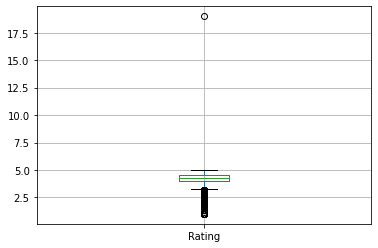

In [ ]:
Play_store_data_df.boxplot()

**From the above data and boxplot we are seeing the the maximum rating is 19. But we count the rating upto 5. So we have to check how many rating values grater than 5 . We have to drop those rows.**


In [ ]:
Play_store_data_df[Play_store_data_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Drop the index 10472 as this index has the 'Rating' more than 5**

In [ ]:
Play_store_data_df.drop(Play_store_data_df.index[10472], inplace = True)

**Now check the 10472 column is removed or not**

In [ ]:
Play_store_data_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


**So now we can see that in the above table row of index '10472' is deleted.**

In [ ]:
Play_store_data_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


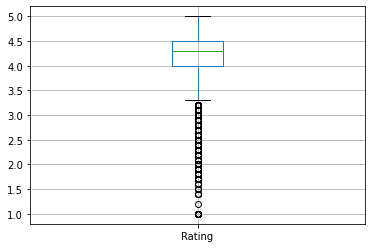

In [ ]:
Play_store_data_df.boxplot()

**So now the maximum rating value is '5'.**

### Check the count of all the null values of all column.

In [ ]:
Play_store_data_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**From the above table we are observing that the Rating column has more number of null values. As we now that by the use of this Rating column we will get some conclusions. so we have to remove the null values.**
**We will replace the null values with the zero value.**

**Updating all the Null values with the zero values and getting the updated 'Rating' column.**

In [ ]:
Play_store_data_df['Rating'] = Play_store_data_df['Rating'].fillna(0)

**Now we will get the 'Rating' column with zero null values.**

In [ ]:
Play_store_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
Play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**So from the above data we can see that now 'Rating' column has zero null values. Now we have to remove the null values from 'Type' , 'Current Ver' , 'Android Ver '.**

**We will replace the null values with the Mode values.**

In [ ]:
# printing mode values of all the columns

print(Play_store_data_df['Type'].mode())

print(Play_store_data_df['Current Ver'].mode())

print(Play_store_data_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


**Now we will replace all null values with mode values.**

In [ ]:
Play_store_data_df['Type'].fillna(str(Play_store_data_df['Type'].mode().values[0]), inplace=True)

Play_store_data_df['Current Ver'].fillna(str(Play_store_data_df['Type'].mode().values[0]), inplace=True)

Play_store_data_df['Android Ver'].fillna(str(Play_store_data_df['Type'].mode().values[0]), inplace=True)

**All the null values of the columns are removed . Now we will check again for the confirmation.**

In [ ]:
Play_store_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**So now all column has Zero null values.**

# **Now we will remove all the special symbols and convert the type of the column values.**

In [ ]:
Play_store_data_df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [ ]:
Play_store_data_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

**From the above two tables we are observing that the 'Install' and 'Price' column has some special symbols. so we will remove those symbols and also we will change the type.**

**Changing the datatype of 'Installs' column data to numeric and removing the '+' sign**

In [ ]:
Play_store_data_df['Installs'] = Play_store_data_df['Installs'].map(lambda x: x.rstrip('+'))
Play_store_data_df['Installs'] = pd.to_numeric(Play_store_data_df['Installs'].str.replace(',',''))

**Changing the datatype of 'Price' column data to numeric and removing the '$' sign**

In [ ]:
Play_store_data_df['Price'] = Play_store_data_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
Play_store_data_df['Price'] = Play_store_data_df['Price'].apply(lambda x: float(x))

**Changing the datatype of 'Reviews' column data to numeric**

In [ ]:
Play_store_data_df['Reviews']=pd.to_numeric(Play_store_data_df['Reviews'], errors='coerce')

In [ ]:
Play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
Play_store_data_df[Play_store_data_df['Size'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Now we can see that the columns are converted into Integer and Float.**

**Now we will convert the 'Size' from KB to MB**

In [ ]:
# Converting KB to MB 
Play_store_data_df['Size'] = Play_store_data_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Play_store_data_df['Size'] = Play_store_data_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
Play_store_data_df['Size'] = Play_store_data_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
Play_store_data_df['Size'] = Play_store_data_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
Play_store_data_df['Size'] = Play_store_data_df['Size'].apply(lambda x: float(x))

In [ ]:
Play_store_data_df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

**We can observe that 'Size' column have now 1695 NaN values. We have to remove all the NaN values without changing the datatype. So now we will Convert all the NaN values of the 'Size' column to '0'**

In [ ]:
Play_store_data_df.loc[Play_store_data_df['Size'].isnull(),'Size']=0

In [ ]:
Play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


**So now all column have zero NaN values**

## **Now we will check is there any duplicate row or not.**

In [ ]:
Play_store_data_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

**From the above data we are observing that we have more than one rows of same 'App' name. So we will take one app and will check all the details.**

In [ ]:
Play_store_data_df[Play_store_data_df['App']=='Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


**From the above data we are observing that same name has multiple rows with almost same properties. So we will remove all the identical rows.**

In [ ]:
Play_store_data_df.drop_duplicates(inplace=True)

# **Data Visualization**

In [ ]:
Play_store_data_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Below graph is showing number of applications according to their size-**

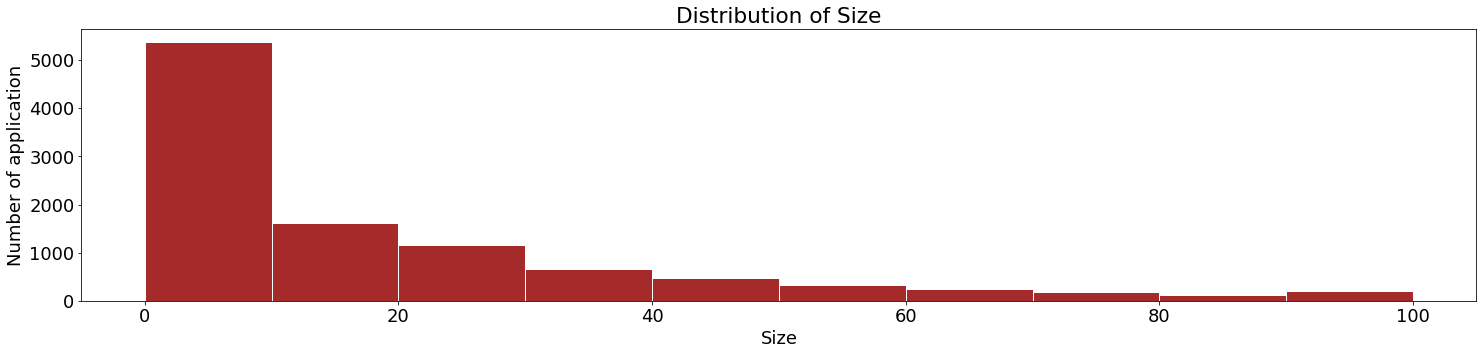

In [ ]:
plt.xlabel("Size")
plt.ylabel('Number of application')
plt.title("Distribution of Size")
plt.hist(Play_store_data_df['Size'] , color='brown', edgecolor='white');
plt.show()
plt.rcParams['figure.figsize'] = (25, 5)
plt.rcParams['font.size'] = 18


**It can be seen that maximum small size application are present in dataset.**

# **Installation according to Size-**

In [ ]:
installs_by_size= Play_store_data_df.groupby(['Size'])[['Installs']].sum().sort_values(by='Installs', ascending=False).head(20)

Text(0.5, 0, 'size')

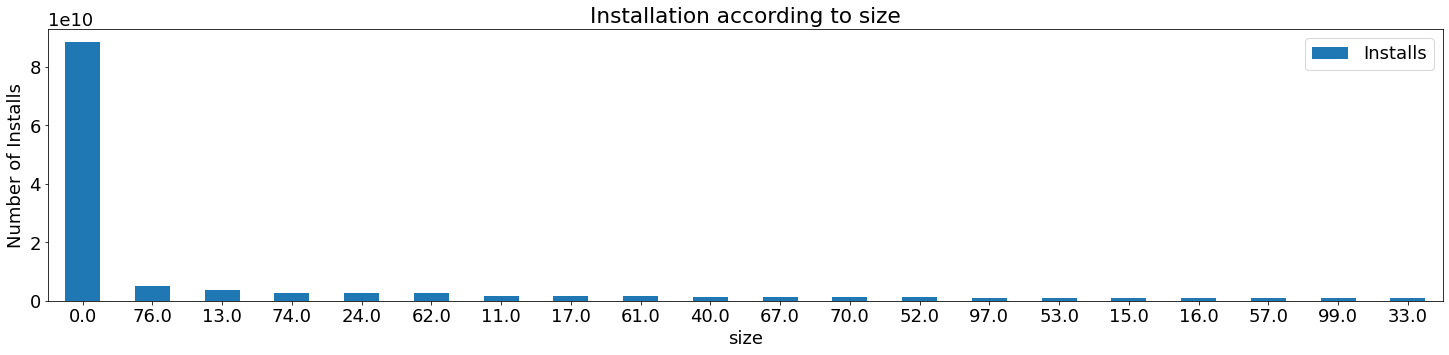

In [ ]:
installs_by_size.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Installation according to size')
plt.ylabel('Number of Installs')
plt.xlabel('size')


# **Top 20 Installs according to Genres-**

In [ ]:
Top_20_installs= Play_store_data_df.groupby(['Genres'])[['Installs']].sum().sort_values(by='Installs', ascending=False).head(20)

Text(0.5, 0, 'Genres')

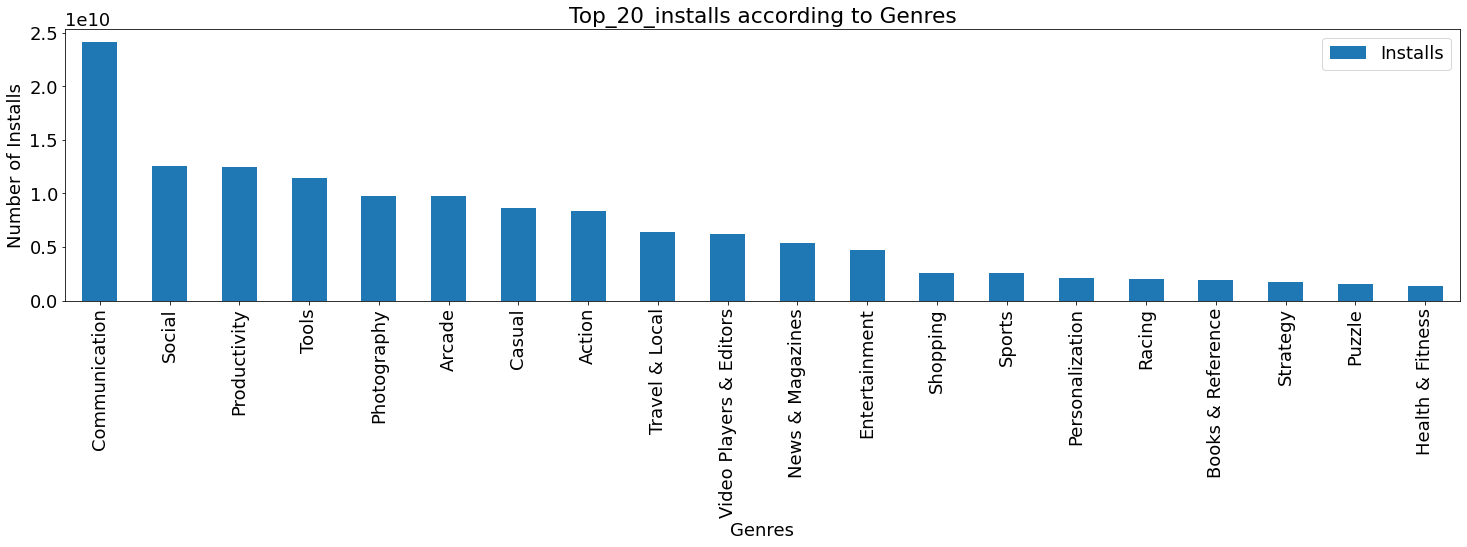

In [ ]:
Top_20_installs.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Top_20_installs according to Genres')
plt.ylabel('Number of Installs')
plt.xlabel('Genres')


# **Installation according to Type-**

/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:124: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  rgb = mplcol.colorConverter.to_rgb(color)


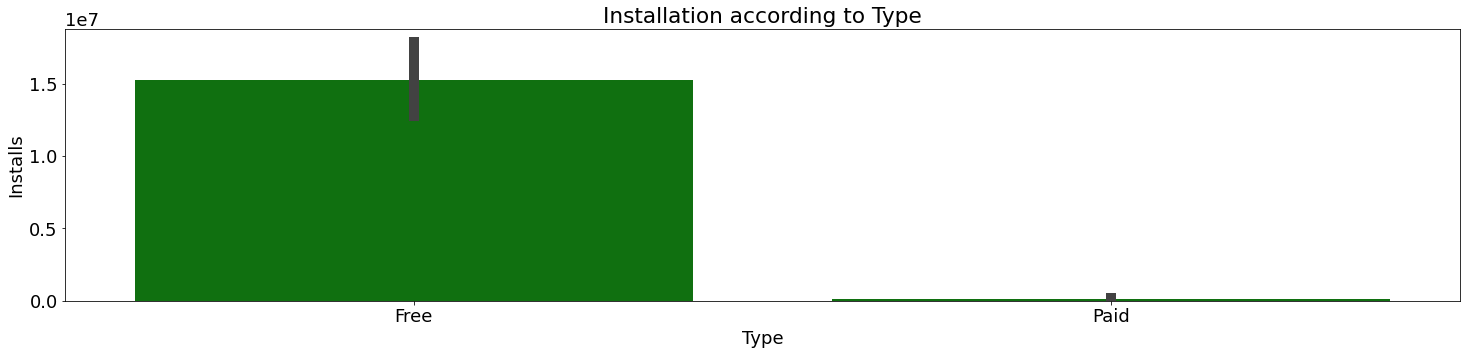

In [ ]:
plt.title('Installation according to Type')
sns.barplot(x='Type', y='Installs', data=Play_store_data_df, ci=100, color='G', errwidth= 10)
plt.show()

**By this graph we can conclude that the free applications are mostly installed by the users. The number of installation of paid application is negligible.**

# **Installation according to Ratings-**

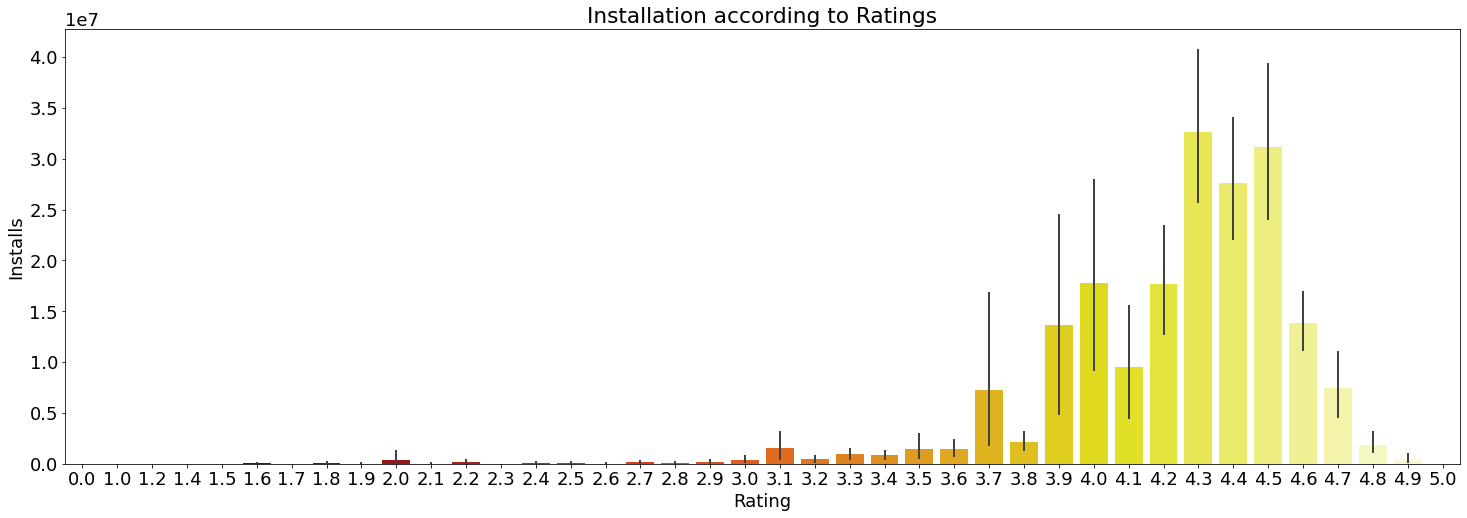

In [ ]:
plt.figure(figsize=(25,8))
plt.rcParams['font.size'] = 18
plt.title('Installation according to Ratings')
sns.barplot(x='Rating', y='Installs', data=Play_store_data_df,  palette='hot', errwidth= 2)

**By this graph we can see that people install the application according to the ratings. Maximum number of application are installed whose rating is more than 3.5.**

## **Now we will add the User Review csv file**

> We will merge the User Review dataframe with Apps


In [ ]:
User_review_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - SUMIT KUMAR DHIBAR/User Reviews.csv')

merge_df = Play_store_data_df.merge(User_review_data_df, on='App')

merge_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**So now our dataframe has Four new columns 'Translated_Review', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity'.**

> Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. 

> Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

> Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].


# **Number of installs Sentiment wise according to Genres**

In [ ]:
category_sentiment = merge_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
print(category_sentiment)

category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

             Category Sentiment  Sentiment Count
0      ART_AND_DESIGN  Negative               61
1      ART_AND_DESIGN   Neutral               62
2      ART_AND_DESIGN  Positive              259
3   AUTO_AND_VEHICLES  Negative               17
4   AUTO_AND_VEHICLES   Neutral               36
..                ...       ...              ...
94      VIDEO_PLAYERS   Neutral               58
95      VIDEO_PLAYERS  Positive              190
96            WEATHER  Negative               33
97            WEATHER   Neutral               35
98            WEATHER  Positive              165

[99 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


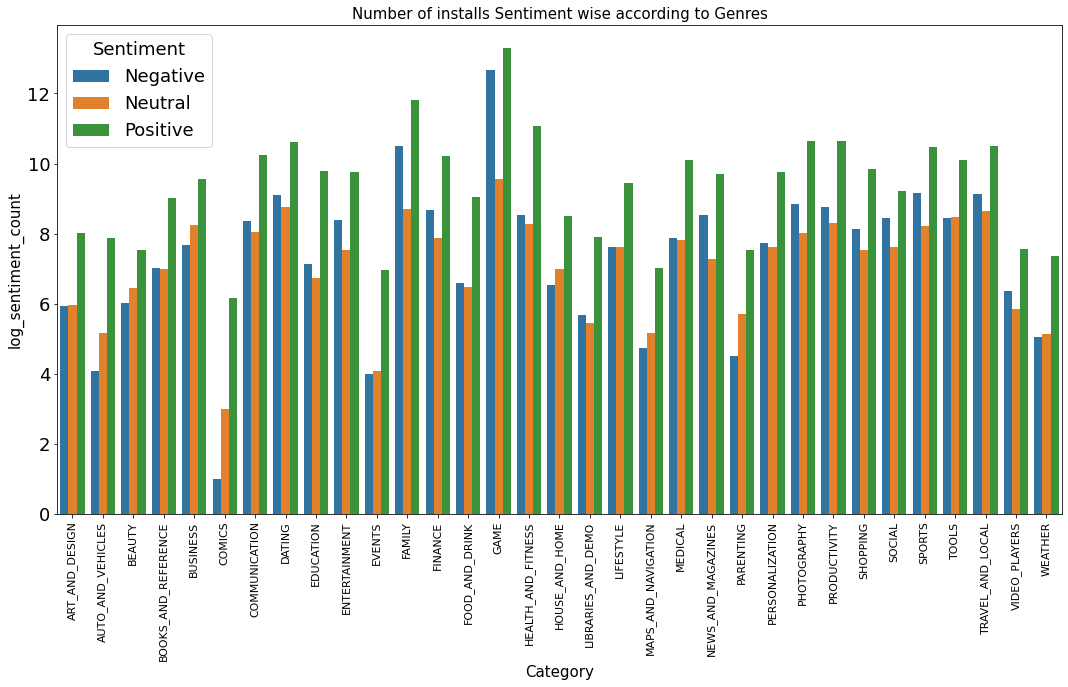

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs Sentiment wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

# **Subjectivity graph**

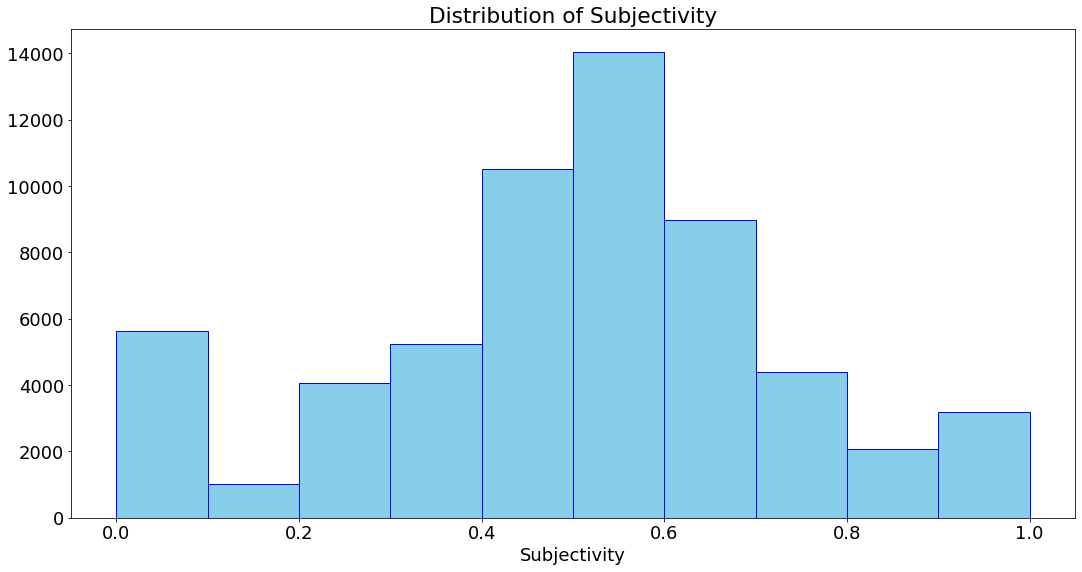

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merge_df[merge_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'] , color='skyblue', edgecolor='blue')
plt.show()

**By this graph we can conclude that maximum number of users give reviews according to their experience**

# **Conclusion-**

After completion of this project we got some conclusions -

*   Users prefer to install free applications more.

*   Communication category apps are in high demand for all type of users.


*   A part of our population ( 18-30 yr age people) use Gaming category applications a lot and give reviews according to their Sentiments. So developers have to keep proper attention while developing those apps or making change.
*  Users installs the application depends according to previous rating and reviews.
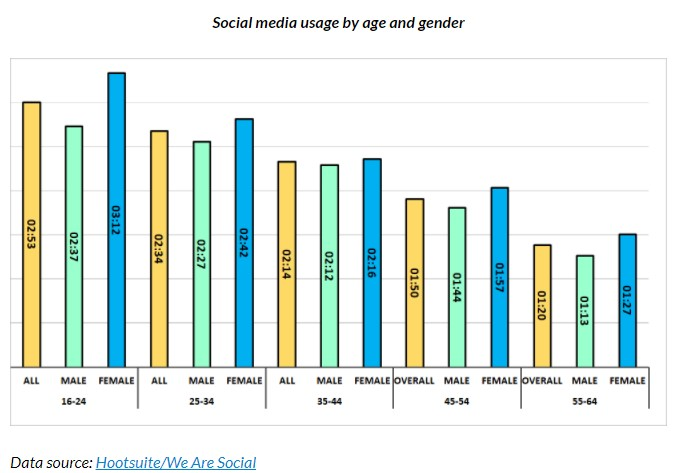